# MILESTONE 1: Data Collection, Data Preprocessing and AWS Integration

#### Task 1: Collect and preprocess the dataset containing historical information about online payment transactions.

# A. Data Preprocessing

### Importing the Libraries

In [1]:
import pandas as pd
import numpy as np
import sklearn
import scipy
import matplotlib.pyplot as plt
import seaborn as sns

### Loading the Dataset

In [2]:
df = pd.read_csv('C:/Users/BABITA/Desktop/Internproject/Fraud_Dataset.csv')

### Display the Dataframe

In [3]:
df.head(10)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,162,CASH_OUT,183806.32,C691771226,19391.00,0.00,C1416312719,382572.19,566378.51,0,0
1,137,PAYMENT,521.37,C203378011,0.00,0.00,M42773300,0.00,0.00,0,0
2,179,PAYMENT,3478.18,C1698571270,19853.00,16374.82,M643984524,0.00,0.00,0,0
3,355,PAYMENT,1716.05,C913764937,5769.17,4053.13,M1387429131,0.00,0.00,0,0
4,354,CASH_IN,253129.93,C2017736577,1328499.49,1581629.42,C407484102,2713220.48,2460090.55,0,0
5,321,PAYMENT,24768.57,C677695730,21573.00,0.00,M1730854331,0.00,0.00,0,0
6,305,CASH_OUT,124718.38,C355629677,0.00,0.00,C1090103022,2482527.99,2607246.37,0,0
7,167,PAYMENT,1464.13,C340132482,60483.00,59018.87,M1065400251,0.00,0.00,0,0
8,396,TRANSFER,353783.72,C234084293,0.00,0.00,C1474695154,1639764.23,1993547.95,0,0
9,347,CASH_IN,266999.97,C1187651682,7411271.89,7678271.86,C1593563915,386812.88,119812.91,0,0


In [4]:
df.shape

(14000, 11)

### Statistical Summary of Dataframe

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14000 entries, 0 to 13999
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   step            14000 non-null  int64  
 1   type            14000 non-null  object 
 2   amount          14000 non-null  float64
 3   nameOrig        14000 non-null  object 
 4   oldbalanceOrg   14000 non-null  float64
 5   newbalanceOrig  14000 non-null  float64
 6   nameDest        14000 non-null  object 
 7   oldbalanceDest  14000 non-null  float64
 8   newbalanceDest  14000 non-null  float64
 9   isFraud         14000 non-null  int64  
 10  isFlaggedFraud  14000 non-null  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 1.2+ MB


In [6]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,14000.000000,1.400000e+04,1.400000e+04,1.400000e+04,1.400000e+04,1.400000e+04,14000.000000,14000.000000
mean,297.741786,7.434423e+05,1.195922e+06,5.739047e+05,8.836182e+05,1.272287e+06,0.428571,0.000786
std,188.468526,1.772606e+06,3.186504e+06,2.541413e+06,3.700201e+06,4.020332e+06,0.494889,0.028021
min,1.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,160.000000,3.144779e+04,5.269927e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000
50%,279.000000,1.584094e+05,9.522652e+04,0.000000e+00,0.000000e+00,1.508215e+05,0.000000,0.000000
75%,400.000000,4.457876e+05,6.715500e+05,3.954378e+03,5.865566e+05,1.102564e+06,1.000000,0.000000
max,743.000000,3.147911e+07,5.731626e+07,4.731626e+07,2.362305e+08,2.367265e+08,1.000000,1.000000


In [7]:
# Assign values to fraud and legit transactions
legit = 8000 
fraud = 6000

# Calculate the percentages
Legit_percent = (legit / (fraud + legit)) * 100
Fraud_percent = (fraud / (fraud + legit)) * 100

# Print the percentages
print("Percentage of the legit transactions: {:.4f} %".format(Legit_percent))
print("Percentage of the fraud transactions: {:.4f} %".format(Fraud_percent))


Percentage of the legit transactions: 57.1429 %
Percentage of the fraud transactions: 42.8571 %


#### Task 2: Handle missing data by imputation or removal

### Handle the Duplicate Values

In [8]:
# Check for duplicate rows
duplicates_values = df.duplicated().sum()
print(f"Duplicates: {duplicates_values}")

Duplicates: 0


### Check for Missing Values

In [9]:
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

#### Task 3: Convert categorical features into numerical representations

In [10]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse_output=False, drop='first')
type_encoded = encoder.fit_transform(df[['type']])
type_encoded_df = pd.DataFrame(type_encoded, columns=encoder.get_feature_names_out(['type']))
data = pd.concat([df.drop('type', axis=1), type_encoded_df], axis=1)
print(data.head())

   step     amount     nameOrig  oldbalanceOrg  newbalanceOrig     nameDest  \
0   162  183806.32   C691771226       19391.00            0.00  C1416312719   
1   137     521.37   C203378011           0.00            0.00    M42773300   
2   179    3478.18  C1698571270       19853.00        16374.82   M643984524   
3   355    1716.05   C913764937        5769.17         4053.13  M1387429131   
4   354  253129.93  C2017736577     1328499.49      1581629.42   C407484102   

   oldbalanceDest  newbalanceDest  isFraud  isFlaggedFraud  type_CASH_OUT  \
0       382572.19       566378.51        0               0            1.0   
1            0.00            0.00        0               0            0.0   
2            0.00            0.00        0               0            0.0   
3            0.00            0.00        0               0            0.0   
4      2713220.48      2460090.55        0               0            0.0   

   type_DEBIT  type_PAYMENT  type_TRANSFER  
0         0.0    

#### Task 4: Normalize numerical features to ensure uniform scales

In [11]:
from sklearn.preprocessing import StandardScaler
numerical_cols = ['step', 'amount','oldbalanceDest', 'newbalanceDest']
scaler = StandardScaler()
data_scaled = data.copy()
data_scaled[numerical_cols] = scaler.fit_transform(data[numerical_cols])
print(data_scaled.head())

       step    amount     nameOrig  oldbalanceOrg  newbalanceOrig  \
0 -0.720262 -0.315725   C691771226       19391.00            0.00   
1 -0.852914 -0.419127   C203378011           0.00            0.00   
2 -0.630058 -0.417459  C1698571270       19853.00        16374.82   
3  0.303819 -0.418453   C913764937        5769.17         4053.13   
4  0.298513 -0.276615  C2017736577     1328499.49      1581629.42   

      nameDest  oldbalanceDest  newbalanceDest  isFraud  isFlaggedFraud  \
0  C1416312719       -0.135415       -0.175591        0               0   
1    M42773300       -0.238811       -0.316474        0               0   
2   M643984524       -0.238811       -0.316474        0               0   
3  M1387429131       -0.238811       -0.316474        0               0   
4   C407484102        0.494478        0.295460        0               0   

   type_CASH_OUT  type_DEBIT  type_PAYMENT  type_TRANSFER  
0            1.0         0.0           0.0            0.0  
1            0

### Histogram Representations of Scaled Numerical Data

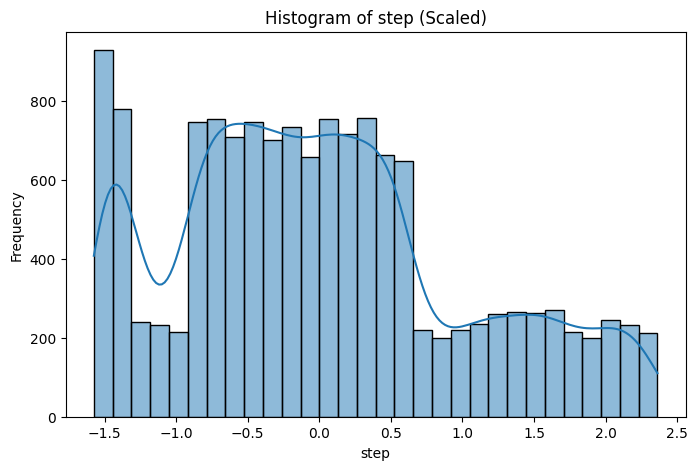

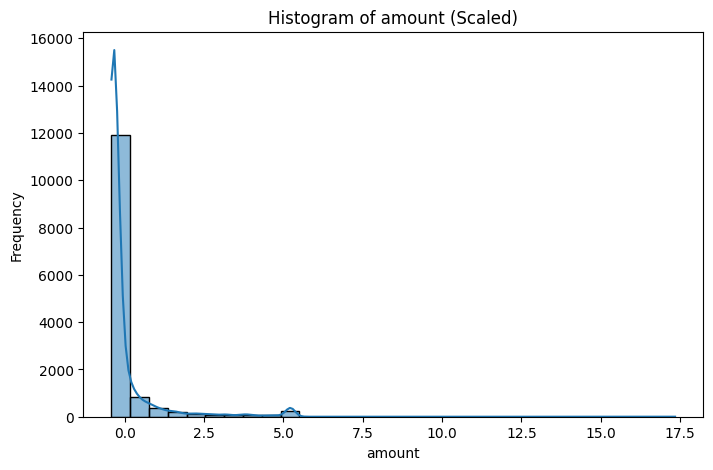

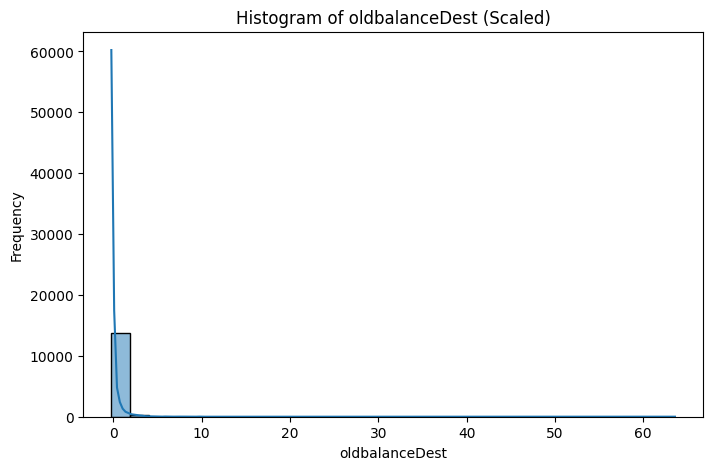

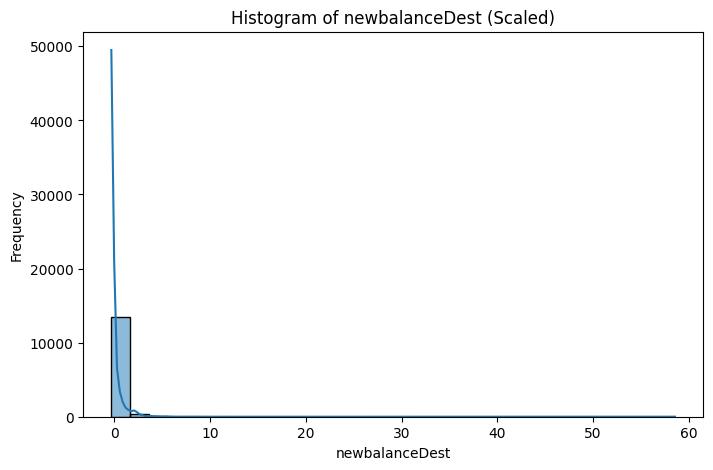

In [12]:
for col in numerical_cols:
    plt.figure(figsize=(8, 5))
    sns.histplot(data_scaled[col], kde=True, bins=30)
    plt.title(f'Histogram of {col} (Scaled)')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()


 ### Visual Representation for Types of Transaction

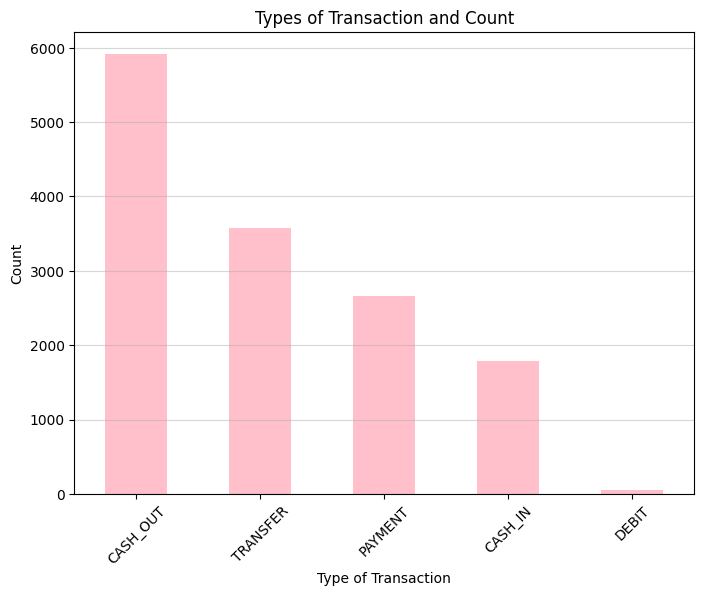

In [13]:
# Count for each transaction type
count = df['type'].value_counts()

# Ensure plots display in Jupyter Notebook
%matplotlib inline 

# Plot the graph
plt.figure(figsize=(8,6))
count.plot(kind='bar', color='Pink')
plt.title('Types of Transaction and Count')
plt.xlabel('Type of Transaction')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='-', alpha=0.5)
plt.show()

### Finding the Correlation using Heatmap

<Axes: >

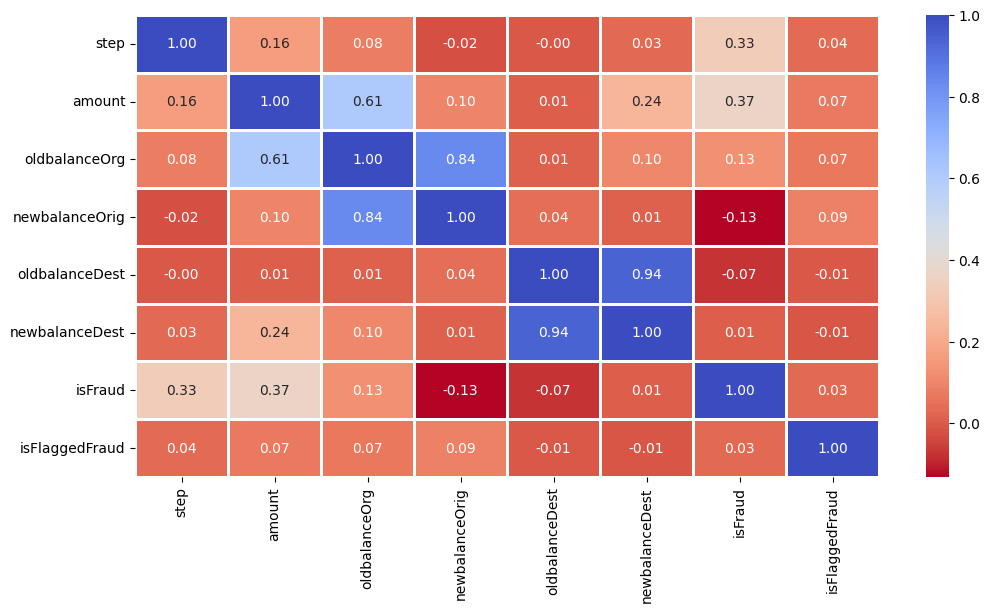

In [14]:
# Finding the correlation using Heatmap
numeric_data = df.select_dtypes(include=np.number)

%matplotlib inline 
plt.figure(figsize=(12, 6))
sns.heatmap(numeric_data.corr(),
            cmap='coolwarm_r',
            fmt='.2f',
            linewidths=2,
            annot=True)

##### In a correlation heatmap, darker colors indicate stronger correlations between variables, while lighter colors indicate weaker correlations. 

### Deleting the Unnecessary/Redundant Columns

In [15]:
# Drop specified columns
df = df.drop(columns=[col for col in ['step', 'nameOrig', 'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFlaggedFraud'] if col in df.columns])
# Print the remaining columns
print("Remaining columns:", df.columns.tolist())

Remaining columns: ['type', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'isFraud']


In [16]:
df.head()

,type,amount,oldbalanceOrg,newbalanceOrig,isFraud
0,CASH_OUT,183806.32,19391.00,0.00,0
1,PAYMENT,521.37,0.00,0.00,0
2,PAYMENT,3478.18,19853.00,16374.82,0
3,PAYMENT,1716.05,5769.17,4053.13,0
4,CASH_IN,253129.93,1328499.49,1581629.42,0


### Is Dataset Balanced?

In [17]:
# Verify counts in the balanced dataset
df['isFraud'].value_counts()

isFraud
0    8000
1    6000
Name: count, dtype: int64

##### As we can see the dataset is not balanced.So, we are using Under-sampling method to Balance the dataset

In [18]:
# Number of samples for the balanced dataset (based on the minority class)
balanced_samples = 6000

# Sample both classes equally
balanced_legit_df = df[df['isFraud'] == 0].sample(n=balanced_samples, random_state=42, replace=False)
balanced_fraud_df = df[df['isFraud'] == 1].sample(n=balanced_samples, random_state=42, replace=False)

# Combine the balanced samples
balanced_df = pd.concat([balanced_legit_df, balanced_fraud_df]).reset_index(drop=True)

### Check if the Dataset is Balanced

In [19]:
# Check the balanced dataset class distribution
print(balanced_df['isFraud'].value_counts())

isFraud
0    6000
1    6000
Name: count, dtype: int64


##### Yes, the the set is Balanced, the 'Fraudulant' and 'Non-Fraudulant' Value Count is same.

### Visual representation of 'Fraudulant' and 'Non-Fraudulant' values

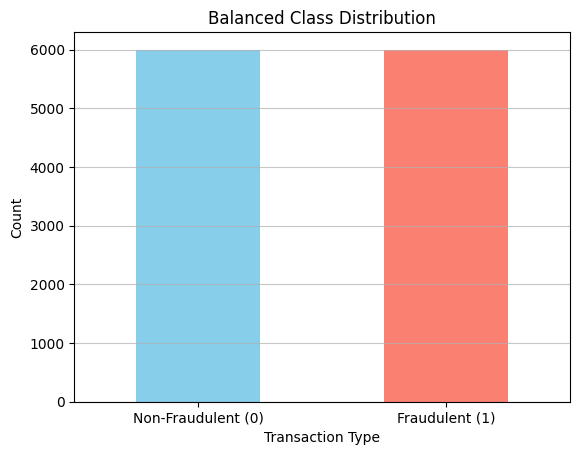

In [20]:
# Plotting the distribution of 'isFraud'
balanced_counts = balanced_df['isFraud'].value_counts()

# Create the bar plot
balanced_counts.plot(kind='bar', title='Balanced Class Distribution', color=['skyblue', 'salmon'])
plt.xticks([0, 1], ['Non-Fraudulent (0)', 'Fraudulent (1)'], rotation=0)
plt.ylabel('Count')
plt.xlabel('Transaction Type')
plt.grid(axis='y',linestyle='-', alpha=0.7)
plt.show()

### Save the Final Dataset

In [21]:
df.to_csv('C:/Users/BABITA/Desktop/Internproject/Final_Cleaned_Dataset.csv', index=False)

# B. Integration of AWS S3 Bucket

### Task 5: Develop a mechanism to store &amp; retrieve the pre-processed data into AWS

### Initialize the Session using credentials

In [ ]:
import boto3

session = boto3.Session(
    aws_access_key_id='AWS_ACCESS_KEY_ID',
    aws_secret_access_key='AWS_SECRET_ACCESS_KEY',
    region_name='ap-south-1'

)

### Access s3 Resources

In [23]:
s3 = session.resource('s3')

### Define the Bucket

In [24]:
bucket_name = 'online-fraud-detection-internship'
bucket = s3.Bucket(bucket_name)

### Upload the File to Bucket

In [25]:
file_name = 'C:/Users/BABITA/Desktop/Internproject/Final_Cleaned_Dataset.csv'                 
s3_file_name = 'Sreya_Boyapati_Final_Dataset.csv'                                       

try:
    bucket.upload_file(file_name, s3_file_name)
    print(f'Successfully uploaded {file_name} to {bucket_name}/{s3_file_name}')
except Exception as e:
    print(f'Error uploading file: {e}')

Successfully uploaded C:/Users/BABITA/Desktop/Internproject/Final_Cleaned_Dataset.csv to online-fraud-detection-internship/Sreya_Boyapati_Final_Dataset.csv


### Check the Upload in Bucket by Listing Files

In [26]:
print(f'Files in bucket {bucket_name}:')
for obj in bucket.objects.all():
    print(obj.key)

Files in bucket online-fraud-detection-internship:
Aravind_P_Finalised_Dataset.csv
Arpit_Tiwari_Final_Dataset.csv
Asritha_Final_Dataset.csv
Charan_Kasanneni_Final_Dataset.csv
Cleaned_preprocessed_DataSet.csv
Cleaned_preprocessed_Dataset.csv
Final_Dataset.csv
Final_cleaned_preprocessed_DataSet.csv
Gunavardhan_Byraju_Final_Dataset.csv
Hariharan_Joga_Final_Dataset.csv
Harsh_Kumar_Final_Dataset.csv
Harshit_Mishra_Final_Dataset.csv
Jahnavi_Final_Dataset.csv
Jinu_Final_Dataset.csv
P_BHUVANA_CHANDRA_Final_Dataset.csv
PavanKalyan_Chittala_Final_Dataset.csv
Preprocessed_Online_Payment_Data.csv
Pruthan_Final_Dataset.csv
Ravula_Pranavi_Final_Dataset.csv
SeshanBharati_final_dataset.csv
Shahir_Basha_Kadiri_Final_cleaned_dataset
Shahir_Basha_Kadiri_Final_cleaned_dataset.csv
Sreya_Boyapati_Final_Dataset.csv
TANGUTURI-VENKATA-THANUJ.csv
Yarlagadda_Lahari_Final_Dataset.csv
cleaned_dataset.csv
cleaned_dataset_Nagamani.csv
data/CrPC_1973.txt
giriprasaths_Final.csv
kaushikimondal_processed_dataset.csv
kau

### Download our file from the Bucket

In [27]:
download_path = r'C:\Users\BABITA\Desktop\Sreya_Boyapati_Final_Dataset.csv'      

try:
    bucket.download_file(s3_file_name, download_path)
    print(f'Successfully downloaded {s3_file_name} to {download_path}')
except Exception as e:
    print(f'Error downloading file: {e}')

Successfully downloaded Sreya_Boyapati_Final_Dataset.csv to C:\Users\BABITA\Desktop\Sreya_Boyapati_Final_Dataset.csv
